# Dependências

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.model_selection import train_test_split

# Carregando os dados

In [2]:
df = pd.read_csv('https://canvas.instructure.com/files/79840847/download?download_frd=1')
df.head()

,Cálculo1,LPT,P1,IC,Cálculo2,cra
0,8.7,10.0,9.0,9.1,8.4,8.477647
1,7.0,7.0,7.7,7.0,6.2,6.851724
2,8.6,9.8,7.9,9.6,8.7,9.090588
3,7.8,8.3,6.8,8.2,8.0,7.283516
4,5.2,9.3,5.0,8.5,5.0,7.205747


# Sumário dos Dados

In [0]:
df.describe()

,Cálculo1,LPT,P1,IC,Cálculo2,cra
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,7.200000,8.480114,7.407955,8.172727,6.323864,7.332535
std,1.228493,0.984522,1.346278,0.894007,1.293662,0.849758
min,5.000000,6.200000,5.000000,5.900000,5.000000,4.874468
25%,6.275000,7.700000,6.500000,7.500000,5.100000,6.841484
50%,7.200000,8.500000,7.750000,8.200000,5.800000,7.274746
75%,8.125000,9.300000,8.325000,8.800000,7.500000,7.883292
max,9.800000,10.000000,10.000000,10.000000,9.300000,9.090588


# Partição Treino/Teste

In [0]:
x = df[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [0]:
x_train.shape
# y_train = y_train.reshape(-1, 1)
# y_train.shape


(79, 5)

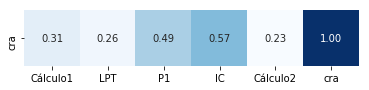

In [0]:
corr = df.corr().loc[['cra'], :]

sns.heatmap(corr, annot = True, fmt='.2f', cmap=plt.cm.Blues, square = True, cbar = False)

Vemos que a variável melhor correlacionada é o IC.

# **Com a variável melhor correlacionada**

In [0]:
x = df[['IC']]
y = df.cra.values.reshape(-1, 1)
x.shape, y.shape

((88, 1), (88, 1))

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train.shape, y_train.shape

((79, 1), (79, 1))

In [0]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

predicaoTreino = lr1.predict(x_train)

rmseTreino = mse(y_train, predicaoTreino) ** 0.5
rmseTreino



0.7184727727075743

In [0]:
predicaoTeste = lr1.predict(x_test)

rmseTeste = mse(y_test, predicaoTeste) ** 0.5
rmseTeste

0.41428714967667374

# **3 melhores correlacionadas**

In [0]:
x = df[['Cálculo1', 'P1', 'IC']]
y = df.cra.values.reshape(-1, 1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train.shape, y_train.shape


((79, 3), (79, 1))

In [0]:
lr2 = LinearRegression()
lr2.fit(x_train, y_train)

predicaoTreino = lr2.predict(x_train)

rmseTreino = mse(y_train, predicaoTreino) ** 0.5
rmseTreino

0.664779133413628

In [0]:
predicaoTeste = lr2.predict(x_test)

rmseTeste = mse(y_test, predicaoTeste) ** 0.5
rmseTeste

0.4161371038950834

# **Com todas as variáveis**

In [0]:
x = df[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']]
y = df.cra.values.reshape(-1, 1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train.head()


,Cálculo1,LPT,P1,IC,Cálculo2
68,7.0,8.0,7.0,8.6,5.3
85,5.0,7.2,7.8,7.4,5.3
65,7.5,8.5,7.3,8.6,7.0
53,7.2,9.1,8.2,8.9,5.2
80,7.2,8.3,7.8,8.1,9.3


In [0]:
lr3 = LinearRegression()
lr3.fit(x_train, y_train)

predicaoTreino = lr3.predict(x_train)

rmseTreino = mse(y_train, predicaoTreino) ** 0.5
rmseTreino

0.6627294390302053

In [0]:
predicaoTeste = lr3.predict(x_test)

rmseTeste = mse(y_test, predicaoTeste) ** 0.5
rmseTeste

0.44108516932368397

O melhor modelo foi o modelo inicial, onde é utilizado apenas o valor de IC, pois ele é o que possui melhor valor de correlação, em relação às outras variáveis.

# Mais de uma partição aleató**ria**

In [0]:
x = df[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']]
y = df.cra.values.reshape(-1, 1)

In [0]:
somaUmaTreino, somaUmaTeste, somaTresTreino, somaTresTeste, somaTodasTreino, somaTodasTeste = 0, 0, 0, 0, 0, 0

j = 0
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=j)
  somaUmaTreino += (mse(y_train, lr1.predict(x_train[['IC']])) ** 0.5)
  somaUmaTeste += (mse(y_test, lr1.predict(x_test[['IC']])) ** 0.5)
  
  somaTresTreino += (mse(y_train, lr2.predict(x_train[['Cálculo1', 'P1', 'IC']])) ** 0.5)
  somaTresTeste += (mse(y_test, lr2.predict(x_test[['Cálculo1', 'P1', 'IC']])) ** 0.5)
  
  somaTodasTreino += (mse(y_train, lr3.predict(x_train)) ** 0.5)
  somaTodasTeste += (mse(y_test, lr3.predict(x_test)) ** 0.5)
  j += 10

In [0]:
mediaModelo3Treino = somaUmaTreino / 10
mediaModelo3Teste = somaUmaTeste / 10

mediaModelo4Treino = somaTresTreino / 10
mediaModelo4Teste = somaTresTeste / 10

mediaModelo5Treino = somaTodasTreino / 10
mediaModelo5Teste = somaTodasTeste / 10

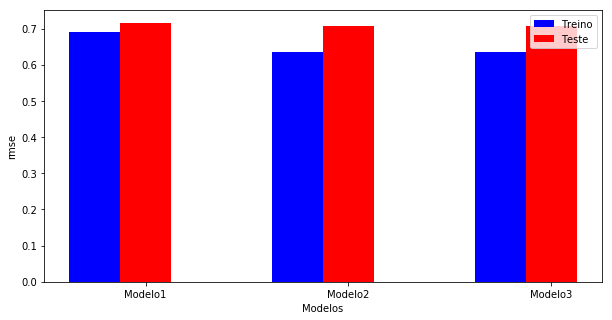

In [0]:
treino = [mediaModelo3Treino, mediaModelo4Treino, mediaModelo5Treino]
teste = [mediaModelo3Teste, mediaModelo4Teste, mediaModelo5Teste]

barWidth = 0.25

plt.figure(figsize=(10,5))

r1 = np.arange(len(treino))
r2 = [x + barWidth for x in r1]

plt.bar(r1, treino, color='blue', width=barWidth, label='Treino')
plt.bar(r2, teste, color='red', width=barWidth, label='Teste')

plt.xlabel('Modelos')
plt.xticks([r + barWidth for r in range(len(treino))], ['Modelo1', 'Modelo2', 'Modelo3'])
plt.ylabel('rmse')

plt.legend()
plt.show()